In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
map = np.zeros((150,100))
map[20:40, 20:40] = -1
map[20:40, 60:80] = -1
plt.imshow(map)

GOAL = (0, 50)

In [ ]:
def get_adjacent(P, shape):
    rlist = []
    if 0 <= P[0] - 1 < shape[0]:
        rlist.append((P[0]-1, P[1]))
    if 0 <= P[0] + 1 < shape[0]:
        rlist.append((P[0]+1, P[1]))
    if 0 <= P[1] - 1 < shape[1]:
        rlist.append((P[0], P[1]-1))
    if 0 <= P[1] + 1 < shape[1]:
        rlist.append((P[0], P[1]+1))
    return rlist

def dstar(map, GOAL):
    cost_map = np.zeros(map.shape) + np.float("inf")
    cost_map[GOAL] = 0
    backpointers = {GOAL:None}
    OPEN = [GOAL]
    CLOSED = []
    while len(OPEN) > 0:
        #OPEN = sorted(OPEN, key=lambda s:cost_map[s])
        c = OPEN.pop(0)
        ps = get_adjacent(c, map.shape)
        for P in ps:
            if P in CLOSED or P in OPEN or map[P] == -1:
                continue
            cost_map[P] = cost_map[c] + 1
            backpointers[P] = c
            OPEN.append(P)
        CLOSED.append(c)
        if len(CLOSED) %1000 == 0:
            plt.imshow(cost_map)
            plt.show()
    return cost_map, backpointers


In [ ]:
dstar_map, dstar_bp = dstar(map, GOAL)

In [ ]:

plt.figure(figsize=(10,10))
plt.imshow(dstar_map)

In [73]:
def get_dstar_path(start, GOAL, dstar_map, dstar_bp):
    path = [start]
    ps = get_adjacent(path[-1], map.shape)
    while GOAL not in ps:
        ps = sorted(ps, key=lambda p: dstar_map[p])
        path.append(ps[0])
        ps = get_adjacent(path[-1], map.shape)
    path.append(GOAL)
    return path

(141, 95)


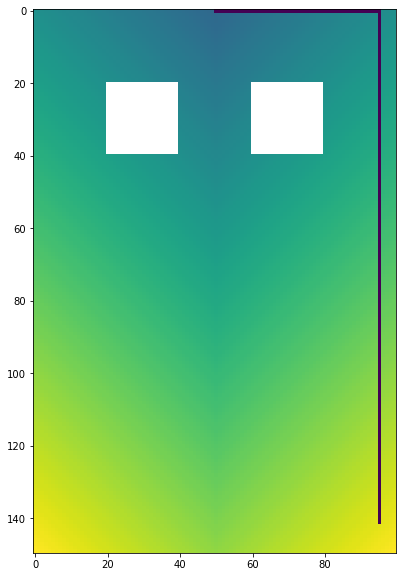

In [122]:

START = (int(np.random.rand()*150),
         int(np.random.rand()*100))
print(START)
PATH = get_dstar_path(START, GOAL, dstar_map, dstar_bp)

pathmap = dstar_map.copy()
for P in PATH:
    pathmap[P] = -100

plt.figure(figsize=(10,10))
plt.imshow(pathmap)